In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
from data_handler import get_data_from_file

importing Jupyter notebook from data_handler.ipynb
['/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_33_2000_input.npy', '/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_33_2000_input.npy', '/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_33_2000_input.npy']
['/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_34_2000_output.npy', '/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_34_2000_output.npy', '/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data/micas913_chunk_34_2000_output.npy']
(150, 4096)
(150, 4096)
[ 8.60324258e-08  8.59541674e-08  1.31835246e-03 ... -3.79417447e-03
  1.14065364e-02  2.84969618e-03]
swapping
(100, 4096) (100, 4096)
4.282919009272799


In [3]:
x,y = datasets.load_boston(return_X_y=True)
x,y = get_data_from_file(10)
print(x.shape, y.shape)

swapping
(500, 4096) (500, 4096)
(500, 4096) (500, 4096)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .2)

In [10]:
model = Sequential()
model.add(Dense(4096, input_dim=x.shape[1], activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dense(y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_20 (Dense)             (None, 8192)              33562624  
_________________________________________________________________
dense_21 (Dense)             (None, 8192)              67117056  
_________________________________________________________________
dense_22 (Dense)             (None, 4096)              33558528  
Total params: 151,019,520
Trainable params: 151,019,520
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, Y_train, epochs=200, batch_size=500)

Epoch 1/200
1/1 [==============================] - 8s 8s/step - loss: 1.0938
Epoch 2/200
1/1 [==============================] - 5s 5s/step - loss: 2.8581
Epoch 3/200
1/1 [==============================] - 5s 5s/step - loss: 0.9842
Epoch 4/200
1/1 [==============================] - 6s 6s/step - loss: 0.9955
Epoch 5/200
1/1 [==============================] - 6s 6s/step - loss: 0.9834
Epoch 6/200
1/1 [==============================] - 6s 6s/step - loss: 0.9839
Epoch 7/200
1/1 [==============================] - 6s 6s/step - loss: 0.9829
Epoch 8/200
1/1 [==============================] - 5s 5s/step - loss: 0.9829
Epoch 9/200
1/1 [==============================] - 6s 6s/step - loss: 0.9816
Epoch 10/200
1/1 [==============================] - 5s 5s/step - loss: 0.9812
Epoch 11/200
1/1 [==============================] - 6s 6s/step - loss: 0.9805
Epoch 12/200
1/1 [==============================] - 6s 6s/step - loss: 0.9799
Epoch 13/200
1/1 [==============================] - 6s 6s/step - loss: 0.

KeyboardInterrupt: 

In [12]:
cost = model.evaluate(X_test, Y_test)

4/4 [==============================] - 2s 207ms/step - loss: 0.9680


In [13]:
y_hat = model.predict(X_test)


28


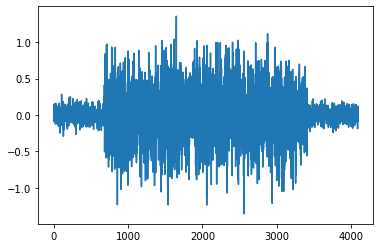

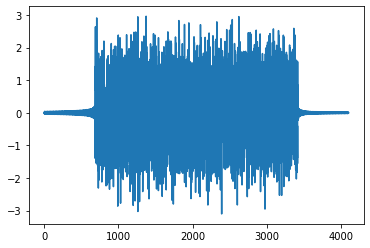

In [14]:
index = np.random.choice(range(Y_test.shape[0]),1)[0]
print(index)
plt.plot(y_hat[index])
plt.show()
plt.plot(Y_test[index])
plt.show()

In [15]:
t_hat = model.predict(X_train)

367


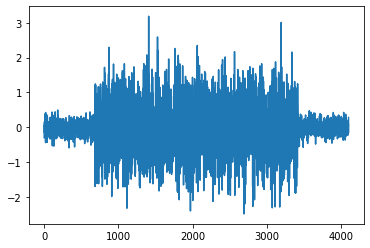

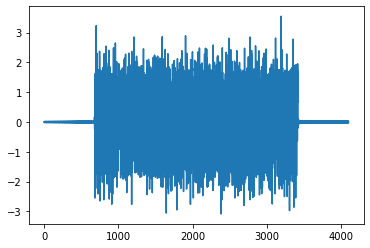

In [16]:
index = np.random.choice(range(Y_train.shape[0]),1)[0]
print(index)
plt.plot(t_hat[index])
plt.show()
plt.plot(Y_train[index])
plt.show()